<a href="https://colab.research.google.com/github/iakshaykr/AI_ML/blob/main/Image_Classification_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow Version : " , tf.__version__)

Tensorflow Version :  2.19.0


Load and preprocess images

In [149]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

Change below data_dir PATH to your data set PATH 

In [150]:
from pathlib import Path

data_dir = Path('/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/' )  # replace with your directory
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


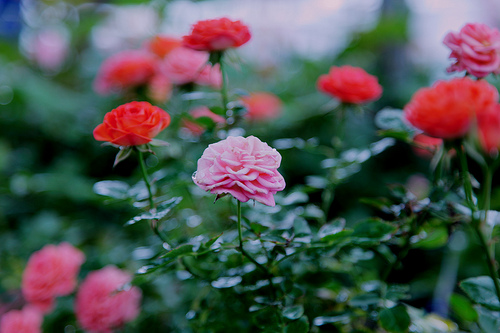

In [151]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

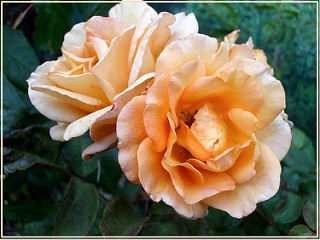

In [152]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))

In [153]:
batch_size = 32
img_height = 180
img_width = 180

In [154]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [155]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [156]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


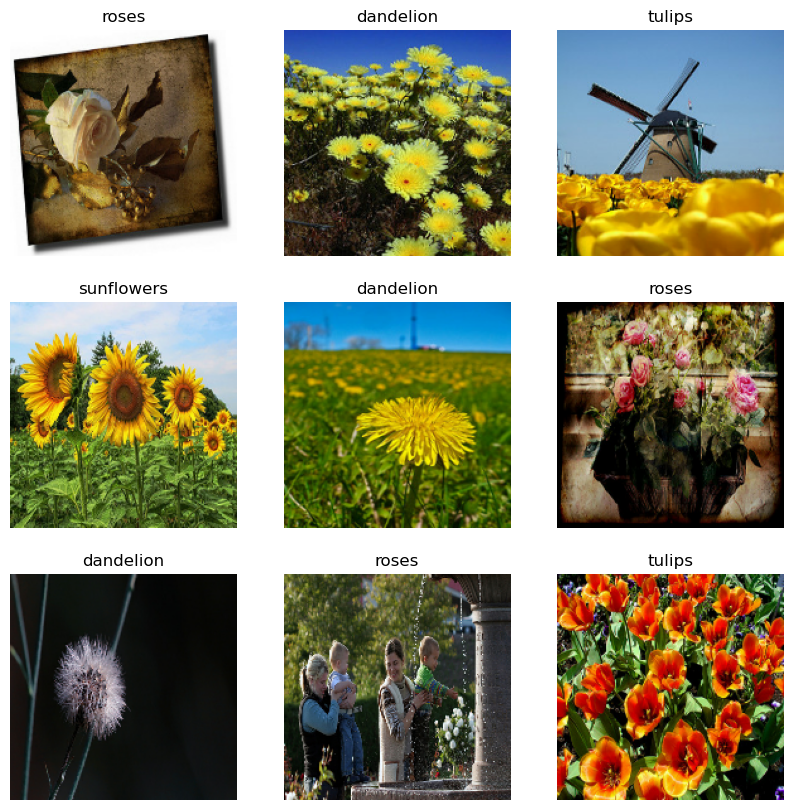

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [158]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [159]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [160]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.96902645


In [161]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [162]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [163]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [164]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.3678 - loss: 1.4512 - val_accuracy: 0.5613 - val_loss: 1.1045
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - accuracy: 0.5973 - loss: 1.0099 - val_accuracy: 0.5518 - val_loss: 1.0349
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - accuracy: 0.6493 - loss: 0.8770 - val_accuracy: 0.5845 - val_loss: 0.9956


In [165]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [166]:
for f in list_ds.take(5):
  print(f.numpy())

b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/tulips/5012813078_99fb977616_n.jpg'
b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/roses/2225411981_6638c3e988.jpg'
b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/tulips/8712269349_2b933da2b8_n.jpg'
b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/dandelion/461632542_0387557eff.jpg'
b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/sunflowers/20410533613_56da1cce7c.jpg'


2025-05-23 22:23:54.653644: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [167]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['.DS_Store' 'daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [168]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [169]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734


In [170]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [171]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [172]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [173]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [174]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  1


In [175]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

2025-05-23 22:23:55.138451: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


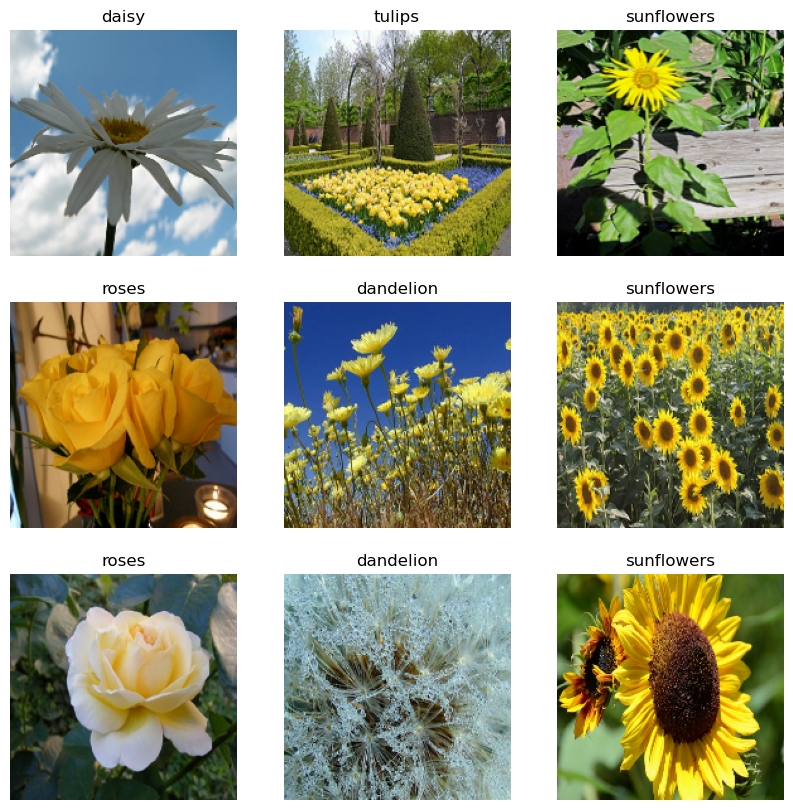

In [176]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [177]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3


2025-05-23 22:23:56.078576: W tensorflow/core/framework/op_kernel.cc:1857] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 4 3 3 4 1 3 2 1 5 4 2 1 4 5 2 4 2 2 4 4 2 4 2 4 2 3 5 5 4 1 4 4


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/akshaykumar/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/akshaykumar/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/akshaykumar/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 729, in execute_request

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 411, in do_execute

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 531, in run_cell

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code

  File "/var/folders/fq/rmcf4vf118l0xb72bpz0jzk40000gn/T/ipykernel_54692/2386738274.py", line 1, in <module>

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 690, in __call__

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 699, in call

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 33, in call

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 2246, in sparse_categorical_crossentropy

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py", line 1964, in sparse_categorical_crossentropy

  File "/Users/akshaykumar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 4 3 3 4 1 3 2 1 5 4 2 1 4 5 2 4 2 2 4 4 2 4 2 4 2 3 5 5 4 1 4 4
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_114894]

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

In [ ]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [ ]:
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
test_ds = configure_for_performance(test_ds)